In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import lux
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Read the data
data=pd.read_csv("D:\\Machine Learning\\Research Work\\IoT intrusion detection\\BOT IOT Dataset\\Training and Test Dataset\\DDOS_UDP_sample.csv")

In [3]:
#Making a copy of data
data=data.copy()

#Feature Engineering

1. Understanding Data

In [4]:
#checking the missing values
data.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64


In [5]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pkSeqID            1117 non-null   int64  
 1   proto              1117 non-null   object 
 2   saddr              1117 non-null   object 
 3   sport              1117 non-null   int64  
 4   daddr              1117 non-null   object 
 5   dport              1117 non-null   int64  
 6   seq                1117 non-null   int64  
 7   stddev             1117 non-null   float64
 8   N_IN_Conn_P_SrcIP  1117 non-null   int64  
 9   min                1117 non-null   float64
 10  state_number       1117 non-null   int64  
 11  mean               1117 non-null   float64
 12  N_IN_Conn_P_DstIP  1117 non-null   int64  
 13  drate              1117 non-null   float64
 14  srate              1117 non-null   float64
 15  max                1117 non-null   float64
 16  attack             1117 

In [6]:
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP
2,3406860,udp,192.168.100.150,31712,192.168.100.3,80,253932,1.928021,100,0.000000,4,2.726619,100,0.0,0.490708,4.097849,1,DDoS,UDP
3,2748123,udp,192.168.100.148,40439,192.168.100.3,80,119506,0.859362,100,2.756653,4,3.907695,100,0.0,0.621363,4.820975,1,DDoS,UDP
4,3456380,udp,192.168.100.148,41921,192.168.100.3,80,41299,0.649773,29,2.744750,4,3.663178,100,0.0,0.729789,4.148325,1,DDoS,UDP


In [7]:
data['proto'].unique()

array(['udp', 'tcp', 'arp', 'ipv6-icmp'], dtype=object)

In [8]:
data['saddr'].unique()

array(['192.168.100.150', '192.168.100.147', '192.168.100.148',
       '192.168.100.149', '192.168.100.5', '192.168.100.3',
       '192.168.100.27', 'fe80::250:56ff:febe:254',
       'fe80::250:56ff:febe:e9d9', '192.168.100.46',
       'fe80::250:56ff:febe:26db', '192.168.100.1', '192.168.100.6',
       'fe80::250:56ff:febe:89ee', '192.168.100.4', '192.168.100.7'],
      dtype=object)

In [9]:
data['daddr'].unique()

array(['192.168.100.3', '192.168.217.2', '192.168.100.55',
       '255.255.255.255', '96.7.49.66', '205.251.197.206',
       '192.168.100.1', '205.251.194.201', '224.0.0.251',
       '205.251.196.32', '52.201.147.106', '192.5.5.241', '192.55.83.30',
       '192.31.80.30', '8.8.8.8', '13.55.154.73', 'ff02::2',
       '192.41.162.30', '129.250.35.250', 'ff02::fb', '27.124.125.250',
       '199.19.56.1', '192.168.100.5', '192.33.14.30', '205.251.199.148',
       '192.58.128.30', '192.12.94.30', '205.251.196.160',
       '205.251.199.194', '192.36.148.17', '184.85.248.65', '192.33.4.12',
       '52.11.124.117', '192.168.100.255', '192.54.112.30', 'ff02::1',
       '172.217.25.170', '205.251.194.102', '192.112.36.4',
       '192.168.100.7', '205.251.194.86', '192.168.100.27',
       '192.52.178.30', '205.251.195.59', '52.35.35.13'], dtype=object)

In [10]:
data.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
#Removing the unwanted coloumns
col=['saddr','daddr','category','subcategory']
data=data.drop(columns=col,axis=1)

In [12]:
#Removing the dublicate values
data.drop_duplicates(keep='first',inplace=True)

2. Exploratory Data Analysis

In [13]:
data.head()

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
0,3142762,udp,6551,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1
1,3257991,udp,22461,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1
2,3406860,udp,31712,80,253932,1.928021,100,0.000000,4,2.726619,100,0.0,0.490708,4.097849,1
3,2748123,udp,40439,80,119506,0.859362,100,2.756653,4,3.907695,100,0.0,0.621363,4.820975,1
4,3456380,udp,41921,80,41299,0.649773,29,2.744750,4,3.663178,100,0.0,0.729789,4.148325,1


In [14]:
#Frequency of each category
data['proto'].value_counts()

udp          1091
tcp            13
arp            10
ipv6-icmp       3
dtype: int64


In [15]:
#relationship between the independent variables
data.corr()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [16]:
#Cross tables and data visualization
#Extracting the coloumn names
data.columns

Index(['pkSeqID', 'proto', 'sport', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack'],
      dtype='object')

In [17]:
#proto proportion table
pd.crosstab(index=data['proto'],columns='count',normalize=True)

col_0,count
proto,
arp,0.008953
ipv6-icmp,0.002686
tcp,0.011638
udp,0.976723


In [18]:
#proto vs attack
pd.crosstab(index=data['proto'],columns=data['attack'],normalize=True)

attack,0,1
proto,,
arp,0.008953,0.00000
ipv6-icmp,0.002686,0.00000
tcp,0.011638,0.00000
udp,0.082363,0.89436


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

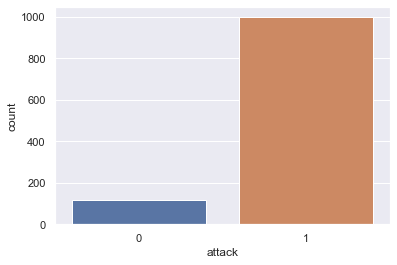

In [19]:
#frequency distribution of attack
sns.countplot(data['attack'])

In [20]:
data=data.drop(columns='pkSeqID')

In [21]:
#Categorical Encoding
data=pd.get_dummies(data)

In [22]:
data.head()

,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,proto_arp,proto_ipv6-icmp,proto_tcp,proto_udp
0,6551,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,0,0,0,1
1,22461,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,0,0,0,1
2,31712,80,253932,1.928021,100,0.000000,4,2.726619,100,0.0,0.490708,4.097849,1,0,0,0,1
3,40439,80,119506,0.859362,100,2.756653,4,3.907695,100,0.0,0.621363,4.820975,1,0,0,0,1
4,41921,80,41299,0.649773,29,2.744750,4,3.663178,100,0.0,0.729789,4.148325,1,0,0,0,1


In [23]:
#Seperating the features and target variable
y=data['attack']
x=data.drop(columns='attack')

In [24]:
data.shape

(1117, 17)

In [25]:
x.shape

(1117, 16)

#

In [26]:
#Balancing the target variable
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

In [27]:
x.shape

(1976, 16)

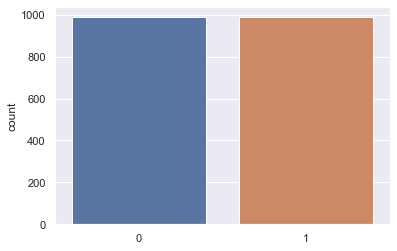

In [28]:
sns.countplot(y)

In [29]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [30]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [32]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("Cross Validation Accuracy: %.2f%% " % (scores.mean()*100))

 Testing Accuracy: 100.00%
Cross Validation Accuracy: 100.00% 


Text(0.5, 1.0, 'AdaboostClassifier')

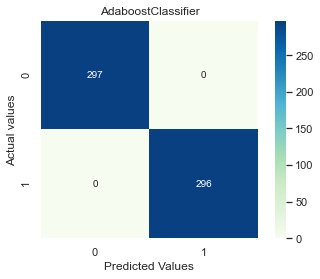

In [33]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('AdaboostClassifier')

In [34]:
from sklearn.metrics import classification_report
print('Adaboost Classifier')
print(classification_report(y_test, y_pred))

Adaboost Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      1.00      1.00       296

    accuracy                           1.00       593
   macro avg       1.00      1.00      1.00       593
weighted avg       1.00      1.00      1.00       593



In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

1.0

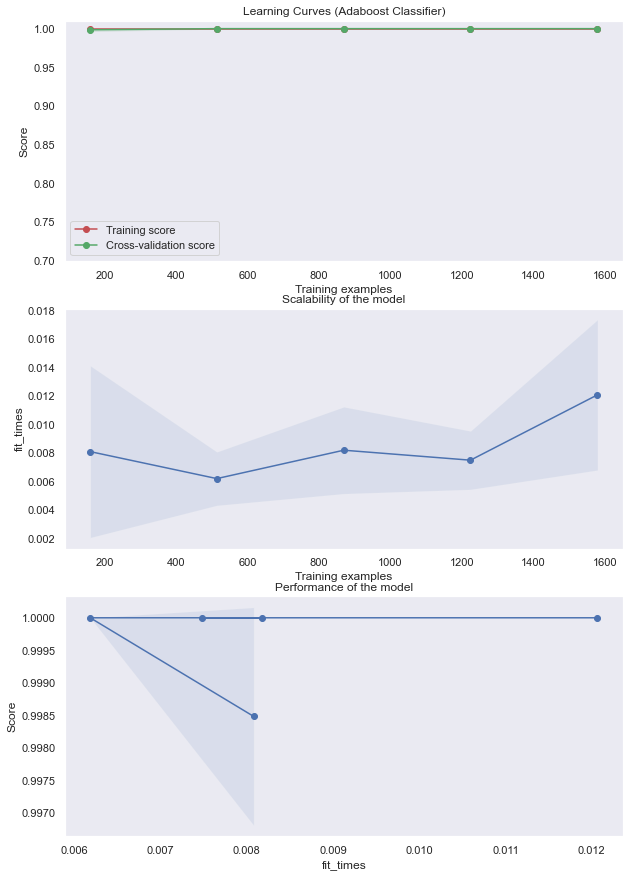

In [37]:
#from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, x, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (Adaboost Classifier)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = AdaBoostClassifier()
plot_learning_curve(estimator, title, x, y,axes=axes[:,], cv=cv, ylim=(0.7, 1.01), n_jobs=4)

plt.show()